# Entregable 2

## Aprendisaje Automatico

**Equipo:** Patrick Murayari, Bruno Weiss, Juan Jara

**Nombre del proyecto**: Aprender 2016-2024 *Entregable 1*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Carga del dataset

In [2]:
ruta_archivo_final = "../data/processed/2024_Ap_56final.csv"

In [3]:
df = pd.read_csv(ruta_archivo_final, low_memory=False)

In [4]:
df.head()

,Nivel_Ed_Madre_Blanco,Nivel_Ed_Madre_Multimarca,Nivel_Ed_Madre_No_disponible,Nivel_Ed_Madre_No_fue_a_la_escuela,Nivel_Ed_Madre_Primaria_completo,Nivel_Ed_Madre_Primaria_incompleto,Nivel_Ed_Madre_Secundaria_completo,Nivel_Ed_Madre_Secundaria_incompleto,Nivel_Ed_Madre_Terciario_universitario_posgrado_completo,Nivel_Ed_Madre_Terciario_universitario_posgrado_incompleto,...,sobreedad_2_años_de_sobreedad_19_años_al_30_de_junio,sobreedad_3_años_o_más_de_sobreedad_20_años_mas_30Jun,sobreedad_Blanco,sobreedad_Edad_teórica_para_el_año_17_años_al_30_de_junio,sobreedad_Menores_de_17_años,Nro_Encuestados,lat,lon,sector_binario,ambito_binario
0,0.0,0.0,0.0,0.007172,0.055456,0.064579,0.225942,0.147031,0.407706,0.092114,...,0.074476,0.036728,0.0,0.706235,0.007220,2002.659903,-34.609558,-58.388790,1,1
1,0.0,0.0,0.0,0.004700,0.028622,0.023414,0.197770,0.112321,0.536276,0.096896,...,0.016029,0.006134,0.0,0.871162,0.009292,1340.107178,-34.609558,-58.388790,0,1
2,0.0,0.0,0.0,0.005595,0.048496,0.026537,0.295964,0.182591,0.337192,0.103626,...,0.065783,0.014148,0.0,0.713113,0.011604,1039.349967,-34.627458,-58.503098,1,1
3,0.0,0.0,0.0,0.000989,0.017445,0.015257,0.221769,0.070848,0.551086,0.122604,...,0.011218,0.008207,0.0,0.904064,0.003789,1318.346955,-34.627458,-58.503098,0,1
4,0.0,0.0,0.0,0.009093,0.056672,0.030278,0.328000,0.212267,0.283693,0.079997,...,0.044247,0.038772,0.0,0.739628,0.002916,806.097723,-34.603006,-58.500717,1,1


### 🗒️ 2. Descripción del dataset (Antes del proceso de limpieza)

Este dataset contiene 44+ variables procedentes del aprender de octubre de 2024

**Variables Categoricas:**

- sector, jurisdiccion, departamento, ambito 


**Variables numéricas:**
- 44 preguntas (dirigidas al alumno) de la encuesta aprender 2024 (ya codificadas one-hot).
- Preguntas sobre el nivel de estudio alcanzado por los padres o adulto responsable.
- Nro_Encuestados: la cantidad de encuestados en esa tupla.

* Conjunto de índices:
- NSE (Nivel Socioeconómico) se construyó con las variables: nivel edu-
cativo de madre y padre, hacinamiento, percepción de la Asignación Universal por Hijo
por hogar, acceso a internet y acceso a TICs
- Clima escolar: 

**Variable objetivo:**
- desempeños en lengua: 'ldesemp_Satisfactorio', 'ldesemp_Por_debajo_del_nivel_básico', 'ldesemp_Básico', 'ldesemp_Avanzado'.
- desempeños en matematica: 'mdesemp_Por_debajo_del_nivel_básico', 'mdesemp_Satisfactorio', 'mdesemp_Básico', 'mdesemp_Avanzado'.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Columns: 1024 entries, Nivel_Ed_Madre_Blanco to ambito_binario
dtypes: float64(1022), int64(2)
memory usage: 9.6 MB


In [6]:
# Información general
df.describe()

,Nivel_Ed_Madre_Blanco,Nivel_Ed_Madre_Multimarca,Nivel_Ed_Madre_No_disponible,Nivel_Ed_Madre_No_fue_a_la_escuela,Nivel_Ed_Madre_Primaria_completo,Nivel_Ed_Madre_Primaria_incompleto,Nivel_Ed_Madre_Secundaria_completo,Nivel_Ed_Madre_Secundaria_incompleto,Nivel_Ed_Madre_Terciario_universitario_posgrado_completo,Nivel_Ed_Madre_Terciario_universitario_posgrado_incompleto,...,sobreedad_2_años_de_sobreedad_19_años_al_30_de_junio,sobreedad_3_años_o_más_de_sobreedad_20_años_mas_30Jun,sobreedad_Blanco,sobreedad_Edad_teórica_para_el_año_17_años_al_30_de_junio,sobreedad_Menores_de_17_años,Nro_Encuestados,lat,lon,sector_binario,ambito_binario
count,1227.0,1227.0,1227.0,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,...,1227.000000,1227.000000,1227.0,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000
mean,0.0,0.0,0.0,0.008584,0.128662,0.094679,0.274149,0.163722,0.277693,0.052512,...,0.037075,0.020101,0.0,0.808175,0.011726,491.885088,-31.317402,-62.065044,0.727791,0.616137
std,0.0,0.0,0.0,0.021722,0.105980,0.085063,0.097674,0.080094,0.167968,0.045450,...,0.042061,0.034665,0.0,0.122686,0.034607,1055.048456,9.169666,6.451507,0.445278,0.486524
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.290339,0.000000,2.959097,-54.807306,-90.191015,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.055578,0.031178,0.216270,0.107461,0.158679,0.019337,...,0.004328,0.000000,0.0,0.739443,0.000000,63.348581,-34.874398,-65.435431,0.000000,0.000000
50%,0.0,0.0,0.0,0.002064,0.105298,0.073098,0.271521,0.166371,0.248242,0.047316,...,0.025444,0.008497,0.0,0.818379,0.003113,143.425822,-32.415206,-61.310797,1.000000,1.000000
75%,0.0,0.0,0.0,0.009513,0.169802,0.136945,0.321429,0.213410,0.378776,0.077771,...,0.056458,0.025734,0.0,0.900284,0.011371,385.394459,-27.649499,-58.788908,1.000000,1.000000
max,0.0,0.0,0.0,0.500000,1.000000,0.821059,1.000000,0.500000,1.000000,0.500000,...,0.417326,0.500000,0.0,1.000000,0.652561,15793.329914,42.328553,-2.467492,1.000000,1.000000


In [7]:
def revisar_nans(df):
    """
    Verifica si un DataFrame tiene valores NaN y los imprime.
    """
    if df.isna().any().any():  # True si hay al menos un NaN
        print("El DataFrame tiene valores NaN.")
        # Opcional: mostrar cuántos NaN por columna
        print(df.isna().sum())
    else:
        print("El DataFrame no tiene valores NaN.")
revisar_nans(df)

El DataFrame no tiene valores NaN.


In [8]:
def mostrar_filas_nan(df):
    """
    Imprime las filas que contienen al menos un valor NaN en el DataFrame.
    """
    filas_nan = df[df.isna().any(axis=1)]
    if not filas_nan.empty:
        print("Filas con NaN:")
        print(filas_nan)
    else:
        print("No hay filas con NaN.")
mostrar_filas_nan(df)

No hay filas con NaN.


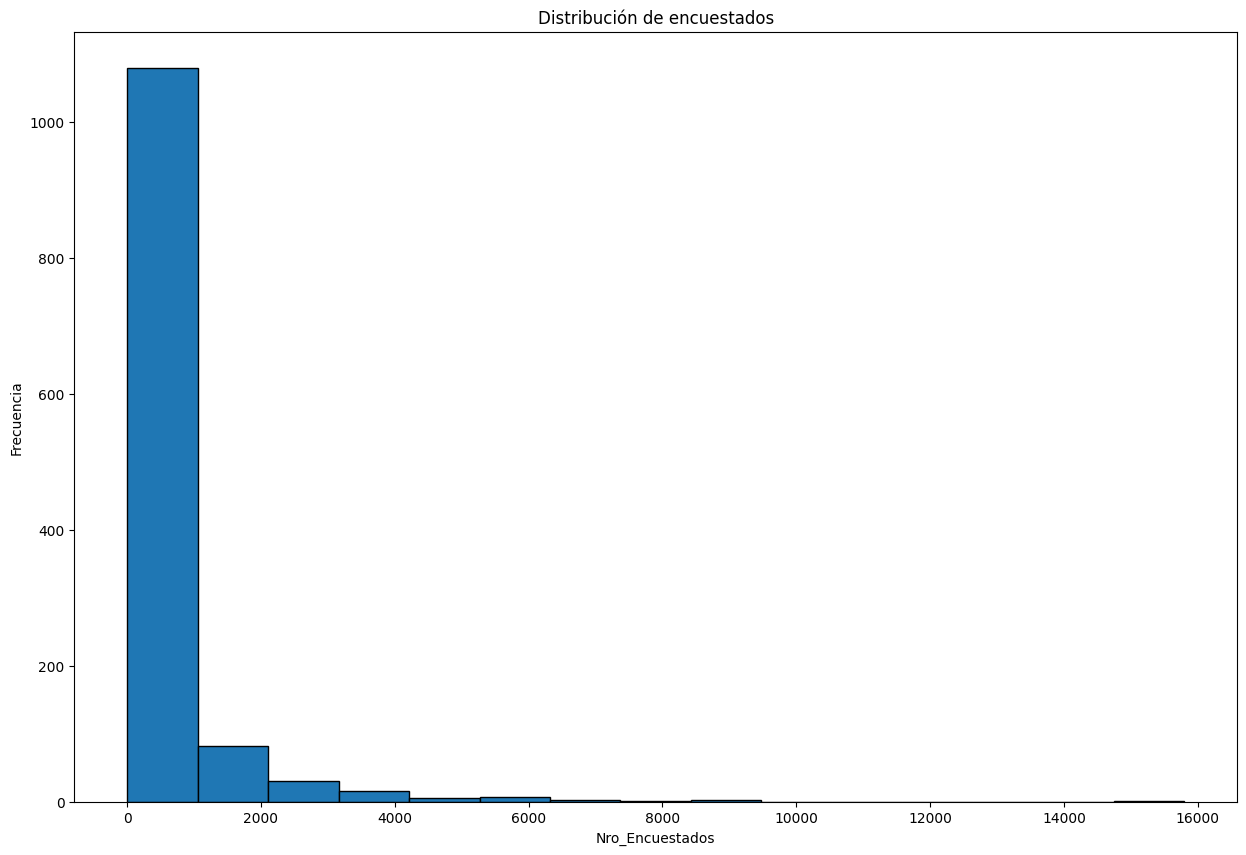

In [10]:
plt.figure(figsize=(15,10))
plt.hist(df['Nro_Encuestados'], bins=15, edgecolor='black')
plt.title('Distribución de encuestados')
plt.xlabel('Nro_Encuestados')
plt.ylabel('Frecuencia')
plt.show()

#### 🧊 Detección de outliers con boxplots

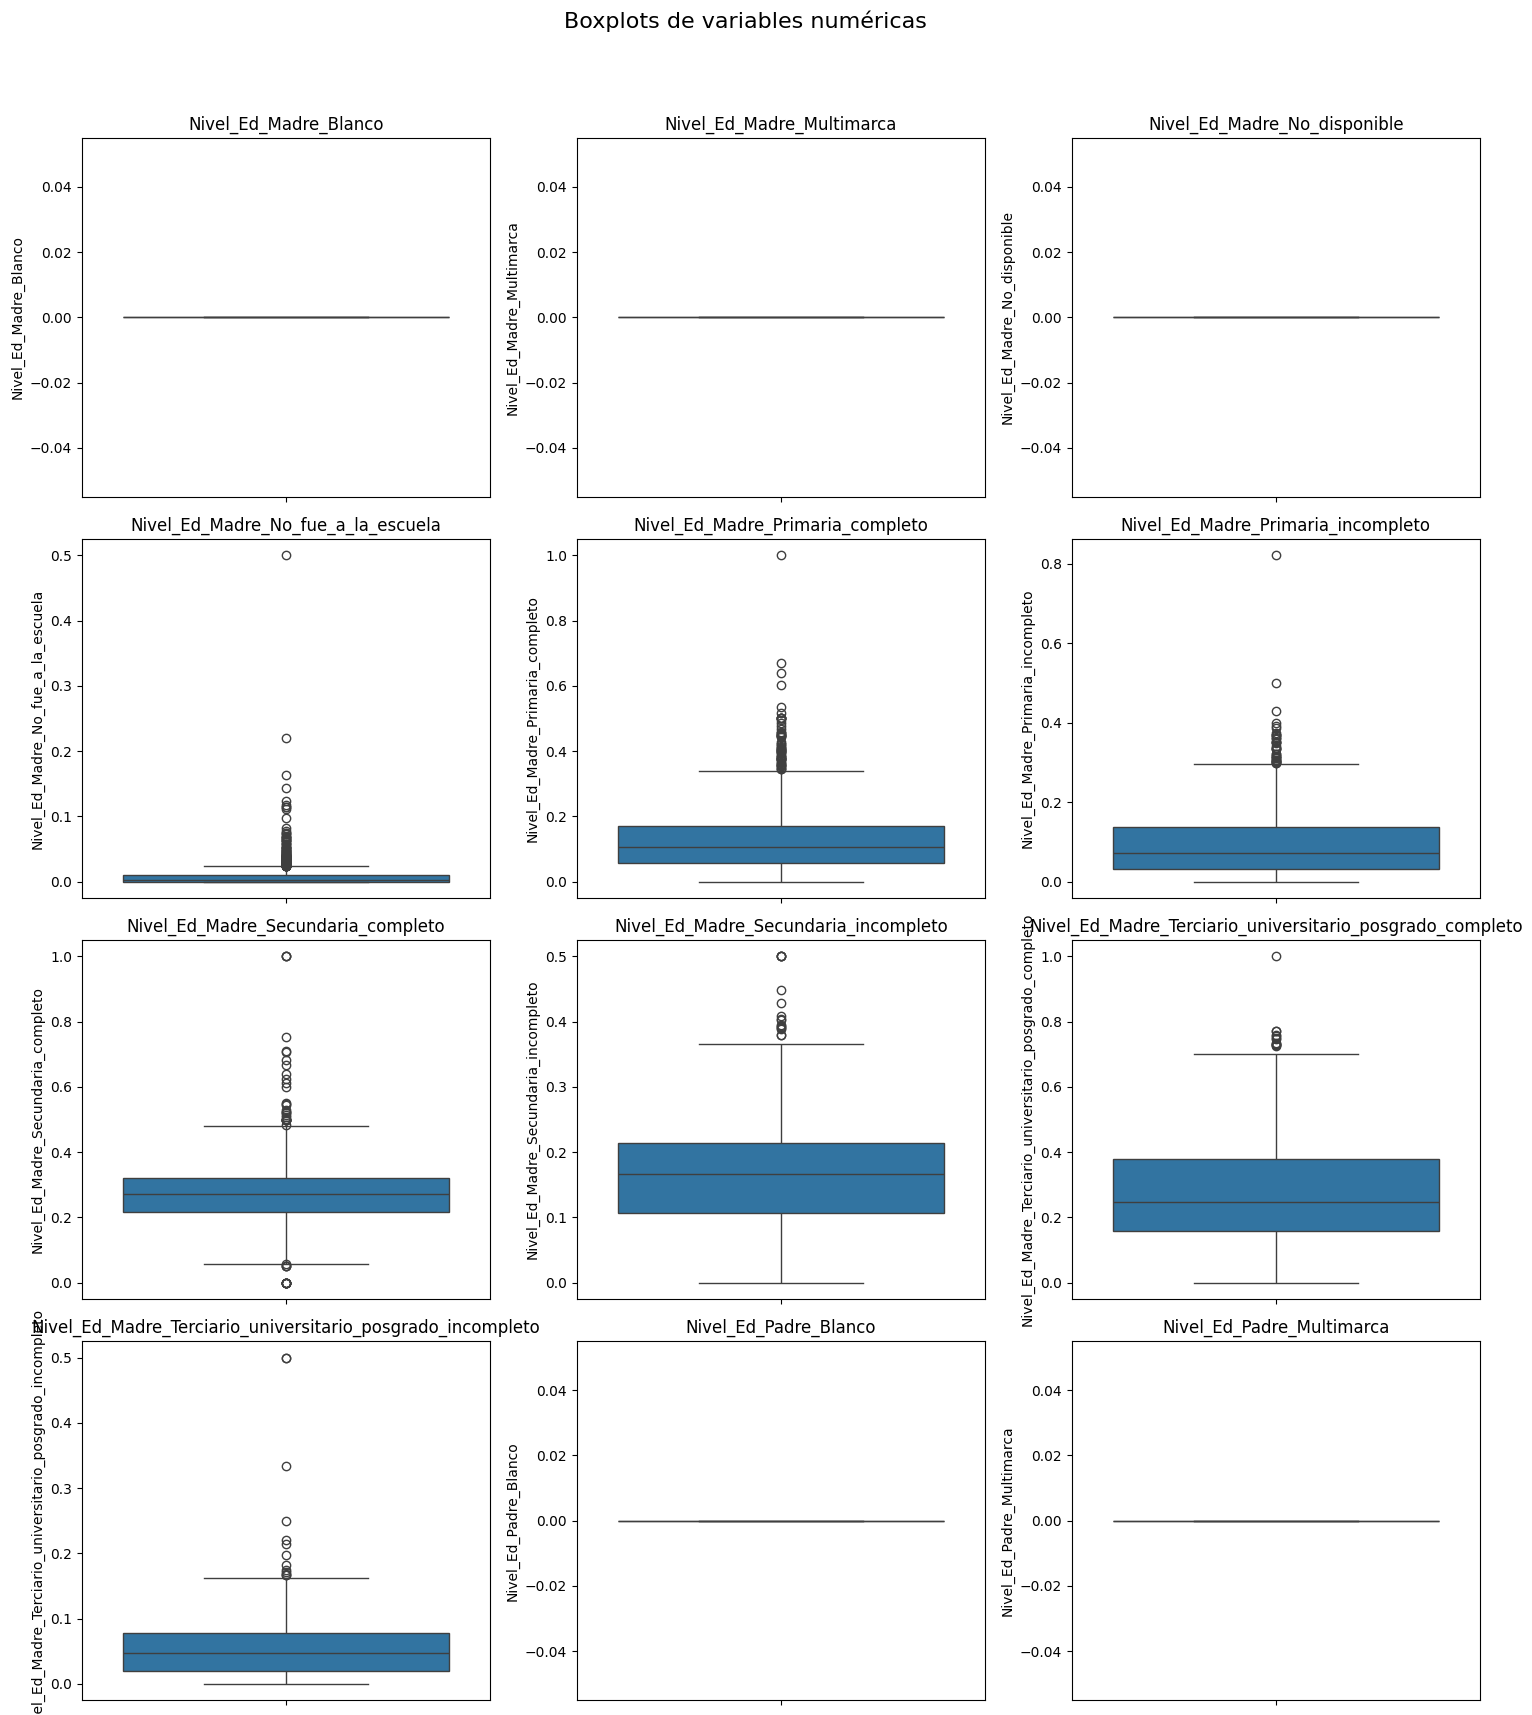

In [9]:
# Boxplots verticales de las 12 variables numéricas (3 por fila)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

columnas = df.select_dtypes(include='number').columns

for i, ax in enumerate(axes.flat):
    sns.boxplot(y=df[columnas[i]], ax=ax)
    ax.set_title(columnas[i])

plt.suptitle('Boxplots de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 🔗 Matriz de correlación entre variables numéricas

#### Atencion solo para COLAB, revienta maquinas

In [1]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
#plt.title("Matriz de correlación")
#plt.show()

#### 📊 Relación entre variables: ejemplo alcohol vs quality

aca metemos alguna con relacion a lmatematica

### 🧼 4. Diagnóstico de calidad de datos
- El Dataset esta presentado con datos censurados.
- Existen 2 versiones, una para los resultados matematica y otra para los lengua.
- siendo que ambas versiones tendrian que tener los mismos datos, hubo variables que variaban 36%
- Debido a esto, se procedio a hacer un promedio entre ambos datasets.
- Variables de indices  clima y NSE , no nos sirven porque son producto de un procesamiento desconocido.
- Existen valores atípicos en varias variables.

### 🧪 5. Transformaciones realizadas

- Muchas variables ya traen codificacion one-hot
- se creo la columna 'Nro_Encuestados'  que es la suma de la pregunta que todos respondieron
el mes en el que nacieron.
- a partir de la variable anterior, se paso todo el dataset a frecuencias, teniendo valores entre 0 y 1
-  sector: 1 estatal | 0  privado
- ambito: 1 urbano | 0 rural
- jurisdiccion y departamento se paso al sistema de coordenadas geograficas, utilizando una API
- Para las ubicaciones enmascaradas y las que dieron error, se utilizo el centroide de la jurisdiccion.


### ✍️ 6. Reflexión final

- Este análisis exploratorio inicial permite entender la estructura y calidad del dataset. Las visualizaciones mostraron varias variables con outliers y diferentes distribuciones.La transformación de quality en una etiqueta categórica permitirá futuros análisis supervisados. La normalización garantiza que todas las variables numéricas estén en una misma escala.

- Se invita a los estudiantes a ser propositivos y analíticos, justificando cada transformación o decisión. Las visualizaciones no deben ser decorativas, sino argumentos visuales que ayuden a entender los datos.

In [ ]:
from pandas.api.types import is_numeric_dtype

def analizar_dataframe(df):
    for col in df.columns:
        print(f"\nColumna: {col}")
        tipo = df[col].dtype

        if is_numeric_dtype(tipo):
            print("Tipo: float")
            print(f"  Media: {df[col].mean()}")
            print(f"  Moda: {df[col].mode().iloc[0] if not df[col].mode().empty else 'Sin moda'}")
            print(f"  Mínimo: {df[col].min()}")
            print(f"  Máximo: {df[col].max()}")

        elif pd.api.types.is_object_dtype(tipo):
            print("Tipo: objeto")
            num_categorias = df[col].nunique()
            if num_categorias > 20:
                print(f"  Más de 20 categorías ({num_categorias}), no se listan.")
            else:
                print(f"  Categorías más frecuentes:")
                print(f"  {df[col].value_counts().head(5)}")
        else:
            print(f"Tipo no explorado: {tipo}")
        print("\n")

In [ ]:
#analizar_dataframe(data)